# Question 4 ~ Naive Bayes

In [1]:
import math
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.validation import column_or_1d
import numpy as np

#read data

train = pd.read_csv("heart_train_data.csv")
validate = pd.read_csv("heart_validate_data.csv")


## Exploratory Data Analysis


In [2]:
train.head()
train.shape
#rename columns

column_names= ['cp', 'exang', 'thal', 'target']
train.columns = column_names

train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cp      210 non-null    int64
 1   exang   210 non-null    int64
 2   thal    210 non-null    int64
 3   target  210 non-null    int64
dtypes: int64(4)
memory usage: 6.7 KB


,cp,exang,thal,target
0,0,1,2,0
1,3,0,2,1
2,3,0,2,1
3,2,0,2,1
4,0,0,3,0


In [3]:
#summary of variables

train['target'].value_counts()
train.sum()

cp        199
exang      68
thal      486
target    117
dtype: int64

In [4]:
#Frequency distribution for values in variables

for i in column_names:
    
    print(train[i].value_counts())
    

0    101
2     58
1     35
3     16
Name: cp, dtype: int64
0    142
1     68
Name: exang, dtype: int64
2    124
3     76
1     10
Name: thal, dtype: int64
1    117
0     93
Name: target, dtype: int64


## Implementation

In [5]:
#Define fecture vectors and target variables

xb = train.drop(['target'], axis=1)
yb = train['target']

#split data into trianing and test sets

from sklearn.model_selection import train_test_split

xb_train, xb_test, yb_train, yb_test = train_test_split(xb, yb, test_size = 0.3, random_state = 0)

xb_train.shape, xb_test.shape

((147, 3), (63, 3))

In [6]:
#Model Training

from sklearn.naive_bayes import GaussianNB
nB = GaussianNB()

#Model Fitting

nB.fit(xb_train, yb_train)


GaussianNB()

In [7]:
#Result Prediction

yb_pred = nB.predict(xb_test)
yb_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [8]:
#Accuracy measurement of the model

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(yb_test, yb_pred)))

Model accuracy score: 0.8254


In [9]:
#Validate dataset

xb_v = validate.drop(['target'], axis=1)
yb_v = validate['target']

xb_v_train, xb_v_test, yb_v_train, yb_v_test = train_test_split(xb_v, yb_v, test_size = 0.3, random_state = 45)

xb_v_train.shape, xb_v_test.shape
yb_v_pred = nB.predict(xb_v_test)
print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(yb_v_test, yb_v_pred)))
#print(classification_report(yv_test, yv_pred, target_names=yv_test['target' == 1]))
#Therefore, D is correct.

Model accuracy score with criterion entropy index: 0.7500


## Exercises


In [10]:
#Class probabilities

#print the first 10 predicted probabilities classes: 0 and 1

yb_pred_prob = nB.predict_proba(xb_test)[0:10]
yb_pred_prob_df = pd.DataFrame(data=yb_pred_prob, columns=['P(no hearth pb)', 'P(hearth pb)'])

yb_pred_prob_df


,P(no hearth pb),P(hearth pb)
0,0.039365,0.960635
1,0.107865,0.892135
2,0.997997,0.002003
3,0.634855,0.365145
4,0.039365,0.960635
5,0.997997,0.002003
6,0.039365,0.960635
7,0.829422,0.170578
8,0.159175,0.840825
9,0.997997,0.002003


Text(0, 0.5, 'Frequency')

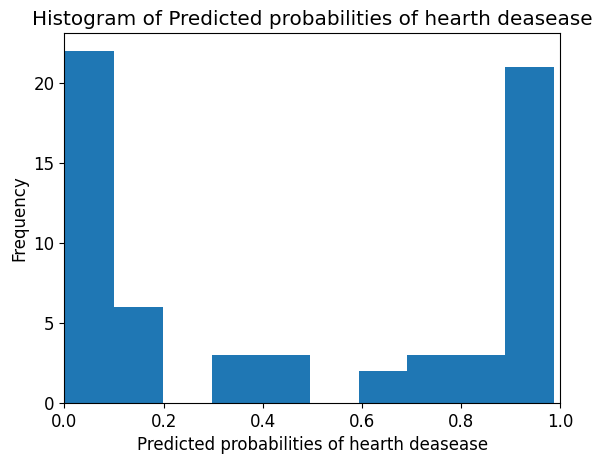

In [11]:
#Histogram
import matplotlib.pyplot as plt 

y_pred1 = nB.predict_proba(xb_test)[:, 1]
# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of Predicted probabilities of hearth deasease')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of hearth deasease')
plt.ylabel('Frequency')

# Question 5 ~ Decision Tree



## Exploratory data analysis

In [12]:
#Decision Tree

import math
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.validation import column_or_1d
import numpy as np


#read data

dft = pd.read_csv("heart_train_data.csv")
dfv = pd.read_csv("heart_validate_data.csv")


In [13]:
dft.head()
dft.shape
#rename columns

column_names= ['cp', 'exang', 'thal', 'target']
dft.columns = column_names

#dft = dft.iloc[0: , :]
dft.info()
dft.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cp      210 non-null    int64
 1   exang   210 non-null    int64
 2   thal    210 non-null    int64
 3   target  210 non-null    int64
dtypes: int64(4)
memory usage: 6.7 KB


,cp,exang,thal,target
0,0,1,2,0
1,3,0,2,1
2,3,0,2,1
3,2,0,2,1
4,0,0,3,0


In [14]:
#summary of variables

dft['target'].value_counts()
dft.sum()

cp        199
exang      68
thal      486
target    117
dtype: int64

In [15]:
#Frequency distribution for values in variables

for i in column_names:
    
    print(dft[i].value_counts())
    

0    101
2     58
1     35
3     16
Name: cp, dtype: int64
0    142
1     68
Name: exang, dtype: int64
2    124
3     76
1     10
Name: thal, dtype: int64
1    117
0     93
Name: target, dtype: int64


## Implementation


In [16]:
#Define fecture vectors and target variables

x = dft.drop(['target'], axis=1)
y = dft['target']

#split data into trianing and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

x_train.shape, x_test.shape

((147, 3), (63, 3))

In [17]:
#Decision Tree with criterion Entropy and depth at most 3
from sklearn.tree import DecisionTreeClassifier

cdt_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, random_state=0)

#model fitting
cdt_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [18]:
y_pred = cdt_entropy.predict(x_test)

In [19]:
#Check Accuracy

from sklearn.metrics import accuracy_score, classification_report

print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy index: 0.8889


In [20]:
#Validation set accuracy


xv = dfv.drop(['target'], axis=1)
yv = dfv['target']

xv_train, xv_test, yv_train, yv_test = train_test_split(xv, yv, test_size = 0.3, random_state = 45)

xv_train.shape, xv_test.shape
yv_pred = cdt_entropy.predict(xv_test)
print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(yv_test, yv_pred)))
#print(classification_report(yv_test, yv_pred, target_names=yv_test['target' == 1]))

Model accuracy score with criterion entropy index: 0.7857


In [21]:
#Vislauize the tree

#import graphviz 
#plot = tree.export_graphviz(cdt_entropy, out_file=None, 
                            #  feature_names=x_train.columns,  
                            #  class_names=y_train,  
                            #  filled=True, rounded=True,  
                            #  special_characters=True)

#graph = graphviz.Source(plot) 

#graph 

#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[22  5]
 [ 2 34]]
